Usefull (fun) links:
Great intuitive explanation of the Fourier series:

From 7:25 to 10:20
https://youtu.be/nmgFG7PUHfo?t=445

https://youtu.be/spUNpyF58BY

https://www.mathsisfun.com/algebra/eulers-formula.html

https://madhavuniversity.edu.in/maclaurins-theorem.html

https://www.mathsisfun.com/algebra/taylor-series.html


Why frequency domain filtering? For complex numbers, amplitudes get multiplied, angles get added
https://www.mathsisfun.com/algebra/complex-number-multiply.html
https://www.youtube.com/watch?v=5PcpBw5Hbwo
Convolution theorem: convolution in time domain equals point-wise multiplication in the frequency domain.

y = fft(x) =  array([-0.03778335+0.j        , -0.03776356-0.00740114j,
       -0.0377042 -0.01480544j, ..., -0.03760521+0.02221607j,
       -0.0377042 +0.01480544j, -0.03776356+0.00740114j])
y.shape: (1024,)


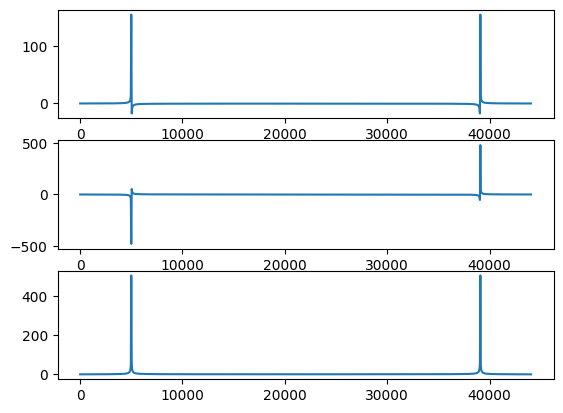

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 44100
t = np.arange(1024)/fs # time segment of 1024/44100 (0.023) seconds -
# FFT algorithm needs power of 2 number of samples
# t = np.arange(fs)/fs # this would represent a 1-second segment
# t = np.arange(fs//2)/fs # this would represent a 0.5-second segment
freq = 5000
x = np.sin( 2*np.pi*freq*t )
y = np.fft.fft( x )

print('y = fft(x) = ', repr(y))
# the real part corresponds to how much of a cosine the signal has
# the imaginary part corresponds to how much of a sine the signal has

plt.subplot(311)
plt.plot( np.arange( y.size )/y.size*fs , y.real)
plt.subplot(312)
plt.plot( np.arange( y.size )/y.size*fs , y.imag)
# Frequency information, disregarding phase, can be found using the magnitude (πλάτος στο πεδίο των συχνοτήτων)
# (sqrt of sum of squares of real and imaginary) of the signal.
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(313)
plt.plot( np.arange( y.size )/y.size*fs , mag)
plt.savefig('../figs/fft.png', dpi=300)
# Question: why keeping the first half is fine?
# Exercise: change bin size and show why it is useful

# How many elements are included in y?
print('y.shape:', y.shape)
# We are interested only the first half - the rest is a "mirrored" / aliased replicate.
# The non-aliased part is the first half - in case we have 1024 time steps, we keep 512.
# So, those 512 (or y.size//2) points represent all possible frequencies from 0 to fs//2 (or 22050).
# Therefore, each of those 512 frequency "bins" represent an equaly-spaced division of the 22050.
# Each bin corresponds to a frequency range of 22050/512 = 43Hz.
# 
# This means that frequencies that are less than 43Hz apart, are hard to distinguish.
# Take-home conclusions:
# 
# 1. Larger windows (e.g., 1024 or 2048 etc) lead to higher-resolution frequency spectrum.
# I.e., smaller frequency bins (e.g., 1024 leads to 43Hz bins, while 2048 leads to 21Hz bins).
# 
# 2. Distinguishing bass/low frequencies is harder, the smaller the window.
# E.g., a signal 20Hz is one octave lower than a 40Hz signal -
# but they are in the same bin (describing 43Hz), with a 1024-sample window.
# But a signal 200Hz is still one octave apart from a 400Hz.
# However, they are many (approximately 5) bins apart...

Discrete Fourier Transform implementations (as the np.fft.fft(x) employed in this document) usually return a real (y.real) and an imaginary (y.imag) part. Frequency amplitude information can be retrieved through the magnitude: $$ \text{M}(f) = \sqrt{a^2+b^2}, $$ where $z=a + i \ b$ $(a, b \in \mathbb{R})$ and $ a = \text{real}(FFT(f)) $ and $ b = \text{imaginary}(FFT(f)) $.

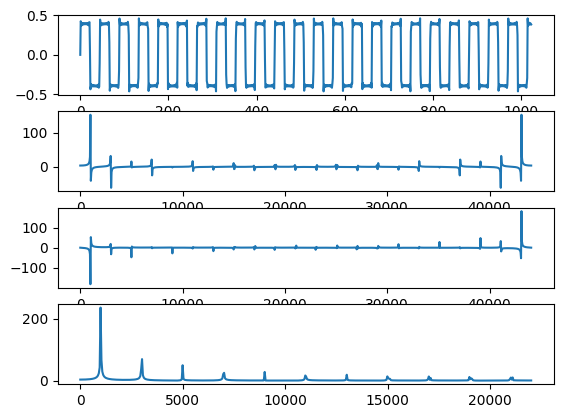

In [2]:
# composite waveform
import sounddevice as sd
fs = 44100
t = np.arange( fs )/fs
f1 = 1000
a1 = 0.5
x = a1*np.sin( 2*np.pi*f1*t )
for i in range(3, 30, 2):
    f2 = f1*i
    a2 = a1/i
    x += a2*np.sin( 2*np.pi*f2*t )
# sd.play( x , 44100 )
y = np.fft.fft( x[:1024] )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(411)
plt.plot( np.arange( 1024 ) , x[:1024] )
plt.subplot(412)
plt.plot( np.arange( y.size )/y.size*fs , y.real )
plt.subplot(413)
plt.plot( np.arange( y.size )/y.size*fs , y.imag[:y.size] )
plt.subplot(414)
# plt.plot( np.arange( y.size )/y.size*fs , mag[:y.size] )
plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )
plt.savefig('../figs/fft.png', dpi=300)
# Exercise: prepare a sawtooth and a square wave by modifying the above given implementation.

f.shape (131867, 2)
shape of file: (131867,) - sample rate: 44100


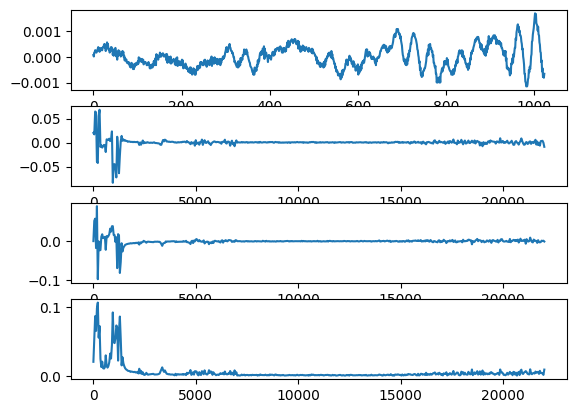

In [3]:
# waveform from file
import scipy.io.wavfile as wf
# load an audio file
i16 = np.iinfo(np.int16)
sr_a, f = wf.read('../audio_files/ah/ah_chirp.wav')
print('f.shape', f.shape)
a = np.interp( f[:,0] , (i16.min, i16.max) , (-1,1) )
# check its shape and sample rate
print('shape of file: ' + str(a.shape) + ' - sample rate: ' + str(sr_a))

# get a part
p = a[15000:16024]

sd.play( a , sr_a )
y = np.fft.fft( p )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(411)
plt.plot( np.arange( 1024 ) , p )
plt.subplot(412)
plt.plot( np.arange( y.size//2 )/y.size*fs , y.real[:y.size//2] )
plt.subplot(413)
plt.plot( np.arange( y.size//2 )/y.size*fs , y.imag[:y.size//2] )
plt.subplot(414)
# plt.plot( np.arange( y.size )/y.size*fs , mag[:y.size] )
plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )
plt.savefig('../figs/fft.png', dpi=300)
# Exercise: prepare a sawtooth and a square wave by modifying the above given implementation.

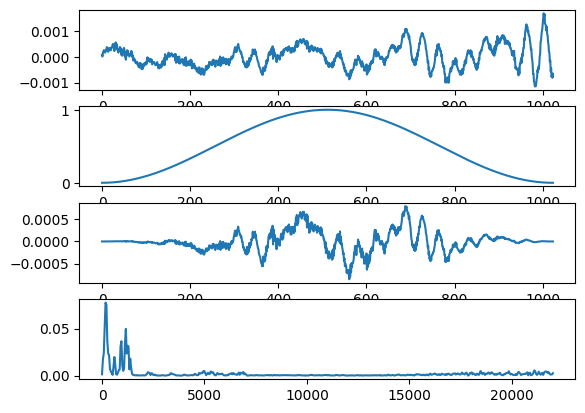

In [4]:
# apply window
w = np.hanning( 1024 )
p_windowed = w*p
# TODO: matrix vs elementwise multiplication
y = np.fft.fft( p_windowed )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(411)
plt.plot( np.arange( 1024 ) , p[:1024] )
plt.subplot(412)
plt.plot( np.arange( 1024 ) , w[:1024] )
plt.subplot(413)
plt.plot( np.arange( 1024 ) , p_windowed[:1024] )
plt.subplot(414)
plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )
plt.savefig('../figs/fft.png', dpi=300)

C:\Users\monog\anaconda3\envs\audio_courses\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\monog\anaconda3\envs\audio_courses\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


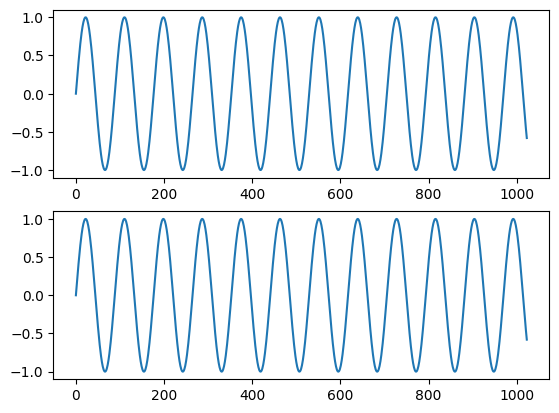

In [5]:
# inverse fft - ifft
fs = 44100
t = np.arange(1024)/fs
freq = 500
x = np.sin( 2*np.pi*freq*t )
y = np.fft.fft( x )
x1 = np.fft.ifft( y )
plt.subplot(211)
plt.plot( np.arange( 1024 ) , x[:1024] )
plt.subplot(212)
plt.plot( np.arange( 1024 ) , x1[:1024] )
# plt.plot( np.arange( x.size ) , x1.imag )

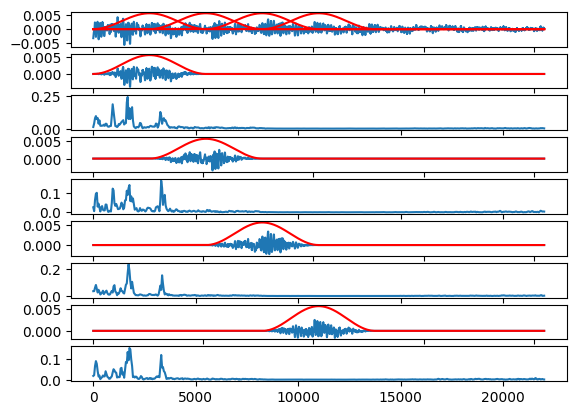

In [6]:
# towards spectrogram
fs = 44100
t = np.arange( fs )/fs
f1 = 200
a1 = 0.5
# x = a1*np.sin( 2*np.pi*f1*t )
# for i in range(2, 30, 1):
#     f2 = f1*i
#     # a2 = a1
#     a2 = a1/i
#     x += a2*np.sin( 2*np.pi*f2*t )

x = a[:44100]

x_part = x[:4096]
w = np.hanning( 1024 )
hop_size = 512
plt.subplot(9,1,1)
plt.plot( np.arange(4096) , x_part )
for i in range(4):
    x_windowed = x_part[ (i*hop_size) : (i*hop_size + 1024) ]*w
    x_empty = np.zeros(4096)
    x_empty[ (i*hop_size) : (i*hop_size + 1024) ] = x_windowed
    w_empty = np.zeros(4096)
    w_empty[ (i*hop_size) : (i*hop_size + 1024) ] = w*np.max(np.abs(x_part))
    y = np.fft.fft( x_windowed )
    mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
    plt.subplot(9,1,1)
    plt.plot( np.arange( 4096 ) , w_empty, 'r' )
    plt.subplot(9,1,2*i+2)
    plt.plot( np.arange( 4096 ) , x_empty )
    plt.plot( np.arange( 4096 ) , w_empty, 'r' )
    plt.subplot(9,1,2*i+3)
    plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )

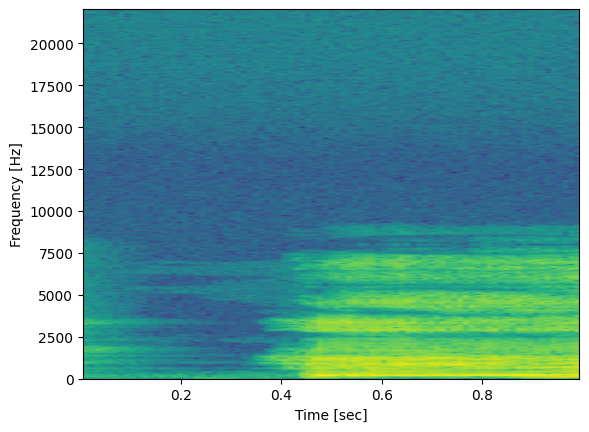

In [7]:
# import scipy.signal as sg

spectrogram, frequencies, times, im = plt.specgram(x, Fs=fs, noverlap=512, NFFT=1024)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig('../figs/spec.png', dpi=300)

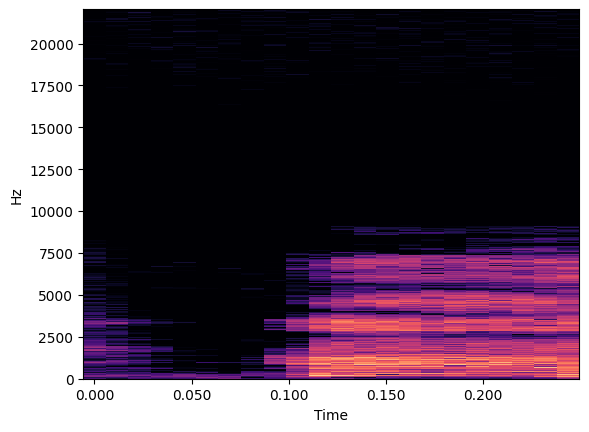

In [9]:
import librosa
import librosa.display

p = librosa.stft(x, n_fft=4096, hop_length=2048)
# d = np.abs(p)
d = librosa.amplitude_to_db( np.abs(p), ref=np.max )
librosa.display.specshow(d, sr=fs, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_lbrs.png', dpi=300)

### Decibel
dB or Decibel is a relative unit of measure, given a reference value. In audio, when it expresses *power*, it is expressed as

$$ L_P = 10\ \log(\frac{P}{P_{\text{ref}}}) \text{,} $$

where $L_P$ is the dB value, $P$ is the *power* presure level within a short time window in the signal and $ P_{\text{ref}} $ is the reference presure level *power*. $ P_{\text{ref}} $ can be considered to describe anything, depending on the field of application.

But in audio we are also concerced with pressure levels directly, instead of power of pressure. In this case, the computation becomes:

$$ L_p = 20\ \log(\frac{p}{p_{\text{ref}}}) \text{,} $$

where all employed terms concern presure level in RMS (to be explained) rather than *power* of the presure level (notice that capital $P$ has become lowercase $p$). Some usually employed $ P_{\text{ref}} $ values are:

1) usually denoted simply as **dB**: absolute threshold of hearing, i.e., $ p_{\text{ref}} = 2*10^{-6} $ pascals (20 micropascals) and

2) usually denoted as **dBFS** (dB full scale): the highest possible value that can be achieved in a system (depends on system characteristics).

The conventional dB values (1) are usually positive (check https://www.iacacoustics.com/blog-full/comparative-examples-of-noise-levels.html) while dBFS (2) is normally negative (in our computers 0 or positive values indicate that the soundcard capacity has been exceeded and we should expect distortion from clipping).

### RMS (Root Mean Square)
RMS (or quadratic mean) describes the amplitude of the signal but *is not* the power of the signal (it has to do with equivalent AC and DC signals in terms of power). We obtain power from RMS by removing the root from (or squaring) RMS. For some description of RMS amplitude check: https://dosits.org/science/advanced-topics/introduction-to-signal-levels/ 

$$ RMS = \sqrt{\frac{1}{N}\sum_{i=0}^{N-1}x_i^2} $$


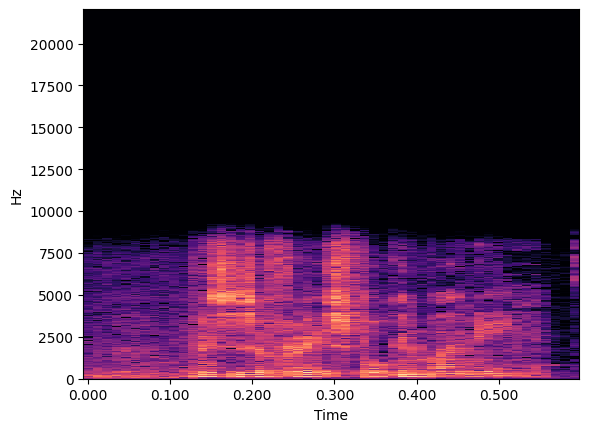

In [10]:
# http://www.cstr.ed.ac.uk/projects/eustace/download.html
# say -o test_file.aif this is a phrase spoken by me
x, sr = librosa.load('../audio_files/human_speech_1.wav', sr=44100)
# x, sr = librosa.load('../audio_files/artificial_speech_1.wav', sr=44100)
p = librosa.stft(x, n_fft=4096, hop_length=2048)
d = librosa.amplitude_to_db( np.abs(p), ref=np.max )
librosa.display.specshow(d, sr=sr, x_axis='time', y_axis='linear', fmax=8000)
plt.savefig('../figs/spec_lbrs.png', dpi=300)
# listen to segment
# sd.play( x , 44100 )

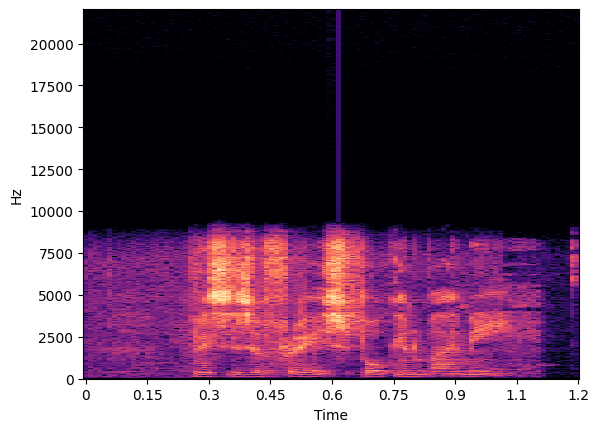

In [12]:
# time domain fir filter
# high pass filter
x_tf1 = np.copy( x )
x_d1 = 0
a = 0.5
for i in range(x_tf1.size):
    x_tf1[i] = a*x[i] - (1-a)*x_d1
    if i > 0:
        x_d1 = x[i]
# or in numpy annotation
# x_tf1[1:] = x_tf1[i] - x_tf1[:-1]
sd.play( x_tf1 , 44100 )

p_tf1 = librosa.stft(x_tf1, n_fft=2048, hop_length=1024)
d_tf1 = librosa.amplitude_to_db( np.abs(p_tf1), ref=np.max )
librosa.display.specshow(d_tf1, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_tf1.png', dpi=300)

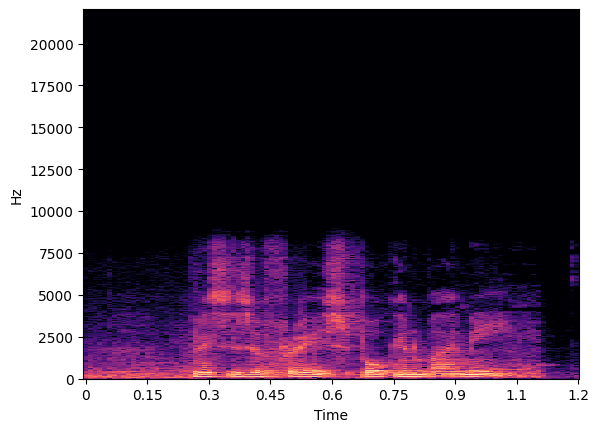

In [13]:
# time domain iir filter
# low pass filter
x_tf2 = np.copy( x )
y_d1 = 0
a = 0.1
for i in range(1, x_tf1.size, 1):
    x_tf2[i] = a*x[i] + (1-a)*y_d1
    if i > 0:
        y_d1 = x_tf2[i]

sd.play( x_tf2 , 44100 )

p_tf2 = librosa.stft(x_tf2, n_fft=2048, hop_length=1024)
d_tf2 = librosa.amplitude_to_db( np.abs(p_tf2), ref=np.max )
librosa.display.specshow(d_tf2, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_tf2.png', dpi=300)

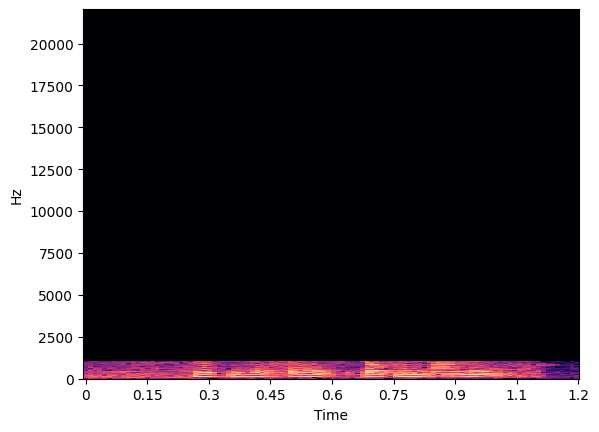

In [14]:
# frequency domain hard low pass
p_ff1 = librosa.stft(x, n_fft=2048, hop_length=1024)
# cut all frequencies above bin 100
p_ff1[50:, :] = 0
d_ff1 = librosa.amplitude_to_db( np.abs(p_ff1), ref=np.max )
librosa.display.specshow(d_ff1, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_ff1.png', dpi=300)

x_ff1 = librosa.istft(p_ff1, hop_length=1024)

sd.play( x_ff1 , 44100 )

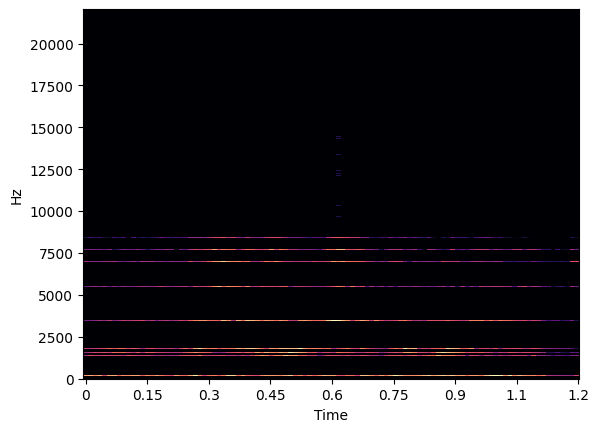

In [15]:
# frequency domain random frequency for all windows hard cancellation
p_ff2 = librosa.stft(x, n_fft=2048, hop_length=1024)
# cut all frequencies in random bins of given proporsions
mask = np.ones(p_ff2.shape[0])
mask[:50] = 0
np.random.shuffle(mask)
p_ff2[ mask.astype(bool) , :] = 0
d_ff2 = librosa.amplitude_to_db( np.abs(p_ff2), ref=np.max )
librosa.display.specshow(d_ff2, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_ff2.png', dpi=300)

x_ff2 = librosa.istft(p_ff2, hop_length=1024)

sd.play( x_ff2 , 44100 )

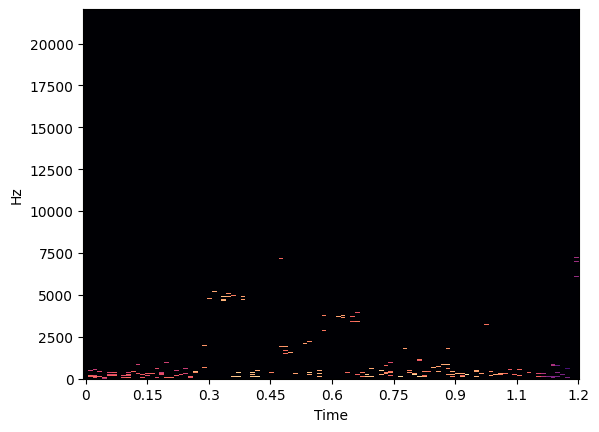

In [16]:
# frequency domain hard cancellation of weak frequencies
p_ff3 = librosa.stft(x, n_fft=2048, hop_length=1024)
# cut all frequencies in random bins of given proporsions
# mask = np.ones(p_ff3.shape)
for i in range(p_ff3.shape[1]):
    tmp_col = np.copy( np.abs(p_ff3[:,i]) )
    tmp_col.sort()
    tmp_threshold = tmp_col[-20]
    p_ff3[ p_ff3[:,i] <= tmp_threshold , i ] = 0
# p_ff3[ mask.astype(bool) ] = 0
d_ff3 = librosa.amplitude_to_db( np.abs(p_ff3), ref=np.max )
librosa.display.specshow(d_ff3, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_ff3.png', dpi=300)

x_ff3 = librosa.istft(p_ff3, hop_length=1024)

sd.play( x_ff3 , 44100 )

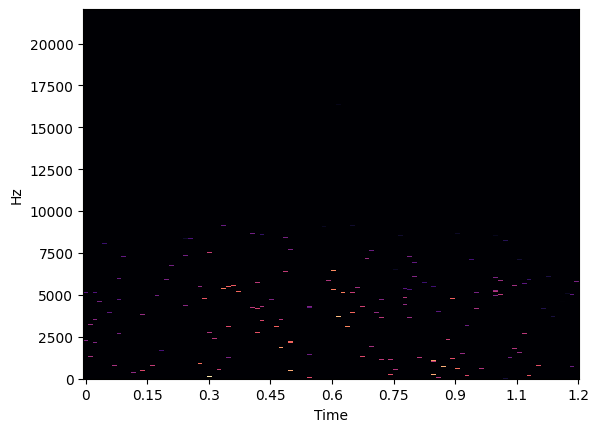

In [17]:
# frequency domain random frequency in each window hard cancellation
p_ff4 = librosa.stft(x, n_fft=2048, hop_length=1024)
# cut all frequencies in random bins of given proporsions
for i in range(p_ff4.shape[1]):
    mask = np.ones(p_ff4.shape[0])
    mask[ :10 ] = 0
    np.random.shuffle(mask)
    p_ff4[ mask.astype(bool) , i ] = 0
d_ff4 = librosa.amplitude_to_db( np.abs(p_ff4), ref=np.max )
librosa.display.specshow(d_ff4, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('../figs/spec_ff4.png', dpi=300)

x_ff4 = librosa.istft(p_ff4, hop_length=1024)

sd.play( x_ff4 , 44100 )

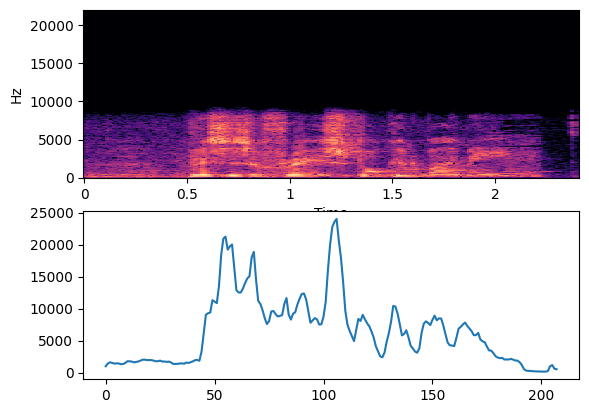

In [18]:
import scipy.stats as sc

p = librosa.stft(x, n_fft=2048, hop_length=512)

ent = np.zeros( p.shape[1] )
for i in range( p.shape[1] ):
    ent[i] = sc.entropy( np.abs(p[:,i]) )*np.sum( np.abs(p[:,i]) )

p_ff4 = librosa.stft(x, n_fft=2048, hop_length=512)
d_ff4 = librosa.amplitude_to_db( np.abs(p_ff4), ref=np.max )

plt.subplot(211)
librosa.display.specshow(d_ff4, sr=sr, x_axis='time', y_axis='linear')
plt.subplot(212)
plt.plot( np.arange( ent.size ) , ent )